# Homework for the 08Oct2018

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# importing the boston dataset
boston_house_prices = datasets.load_boston()

In [3]:
# declare the column names
columns = "crim zn indus chas nox rm age dis rad tax ptratio b lstat".split()

In [4]:
# loading the sklearn dataset into pandas dataframe
x = pd.DataFrame(boston_house_prices.data, columns = columns)
y = pd.DataFrame(boston_house_prices.target)

In [5]:
# create training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
show_steps = True

# using forward selection
# start with no predictors
included = []
r2_list = []
adjusted_r2_list = []
# keep track of model and parameters
best = {"feature":"",
        "r2":0,
        "adjusted_r2":0}
# Create a model for Linear 
model = LinearRegression()
# Get the number of cases in the test data
n = x_test.shape[0]

while True:
    changed = False
    if show_steps:
        print("")
    
    excluded = list(set(x.columns)-set(included))
    
    if show_steps:
        print("(Step) Excluded = %s" % "," .join(excluded))
        
    for new_column in excluded:
        if show_steps:
            print("(Step) Trying %s..." % new_column)
            print("(Step) - Features = %s" % ", " .join(included + [new_column]))
    
        fit = model.fit(x_train[included + [new_column]], y_train)
        r2 = model.score(x_test[included + [new_column]], y_test)
        
        # number of predictors in the model
        k = len(included) + 1
        adjusted_r2 = 1 - (((1-r2)*(n-1)) / (n-k-1))
        
        if show_steps:
            print("(Step) - Adjusted R-square: This = %.3f; Best = %.3f" 
                  % (adjusted_r2, best["adjusted_r2"]))
        
        if adjusted_r2 > best["adjusted_r2"]:
            best = {"feature":new_column,
                    "r2":r2,
                    "adjusted_r2":adjusted_r2}
            changed = True
            if show_steps:
                print("(Step) - New Best! : Feature = %s; R2 = %.3f; Adjusted R2 = %.3f"
                      %(best["feature"], best["r2"], best["adjusted_r2"]))
    if changed:
        r2_list.append(best["r2"])
        adjusted_r2_list.append(best["adjusted_r2"])
        included.append(best["feature"])
        excluded = list(set(excluded) - set(best["feature"]))
        print("Added feature %-4s with R2 = %.3f and adjusted R2 = %.3f" % 
              (best["feature"], best["r2"], best["adjusted_r2"]))
    else:
        break
print("")
print("Resulting Features")
print(", ".join(included))


(Step) Excluded = age,nox,rad,ptratio,indus,rm,zn,crim,dis,b,lstat,chas,tax
(Step) Trying age...
(Step) - Features = age
(Step) - Adjusted R-square: This = 0.174; Best = 0.000
(Step) - New Best! : Feature = age; R2 = 0.182; Adjusted R2 = 0.174
(Step) Trying nox...
(Step) - Features = nox
(Step) - Adjusted R-square: This = 0.204; Best = 0.174
(Step) - New Best! : Feature = nox; R2 = 0.212; Adjusted R2 = 0.204
(Step) Trying rad...
(Step) - Features = rad
(Step) - Adjusted R-square: This = 0.190; Best = 0.204
(Step) Trying ptratio...
(Step) - Features = ptratio
(Step) - Adjusted R-square: This = 0.268; Best = 0.204
(Step) - New Best! : Feature = ptratio; R2 = 0.275; Adjusted R2 = 0.268
(Step) Trying indus...
(Step) - Features = indus
(Step) - Adjusted R-square: This = 0.258; Best = 0.268
(Step) Trying rm...
(Step) - Features = rm
(Step) - Adjusted R-square: This = 0.602; Best = 0.268
(Step) - New Best! : Feature = rm; R2 = 0.606; Adjusted R2 = 0.602
(Step) Trying zn...
(Step) - Features 

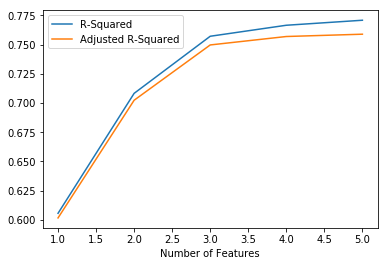

In [7]:
# plot each metric 
x_range = len(np.array(r2_list))
plt.plot(range(1,x_range+1), r2_list, label = "R-Squared")
plt.plot(range(1,x_range+1), adjusted_r2_list, label = "Adjusted R-Squared")
# add some better visualisation
plt.xlabel("Number of Features")
plt.legend()
# output the chart
plt.show()